In [1]:
%run ../common_functions/import_all.py

import cv2
import os

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Object Detection with Haar cascades

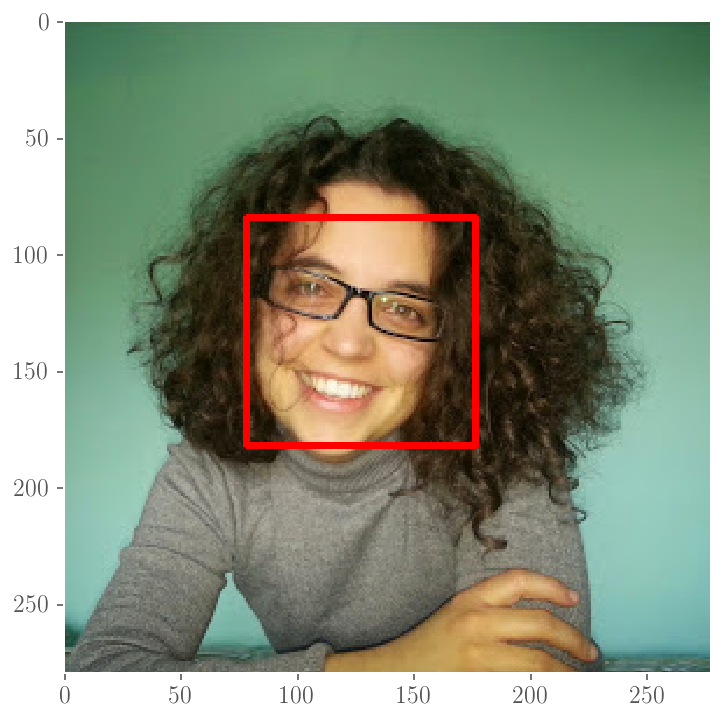

In [3]:
# Read image: we'll use my beautiful face ... (transform into RGB as OpenCV reads in BGR)
image = cv2.imread('foto_martina.jpg')
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Transform image in grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# use the trained model for frontal face
# have to pass path to where model is stored
face_cascade = cv2.CascadeClassifier(os.getenv('HOME') + 
                                     '/Desktop/packages/opencv-3.2.0/data/haarcascades/' + 
                                     'haarcascade_frontalface_default.xml')

# detect my face and where it is (draw ROI around it), detection is on the grayscale one
objects = face_cascade.detectMultiScale(image_gray, scaleFactor=1.3, minNeighbors=5)
for (x,y,w,h) in objects:
    cv2.rectangle(RGB_image, (x,y), (x+w,y+h), (255, 0, 0), 2)
        
plt.imshow(RGB_image)
plt.grid()
plt.savefig('me-haar.png', dpi=200)
plt.show();